In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [7]:
filename = "/Users/sahithi/Desktop/Advertising.csv"

In [9]:
df = pd.read_csv(filename)

In [10]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# Explain the dataset

In [14]:
del df["Unnamed: 0"]


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [16]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [17]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [21]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

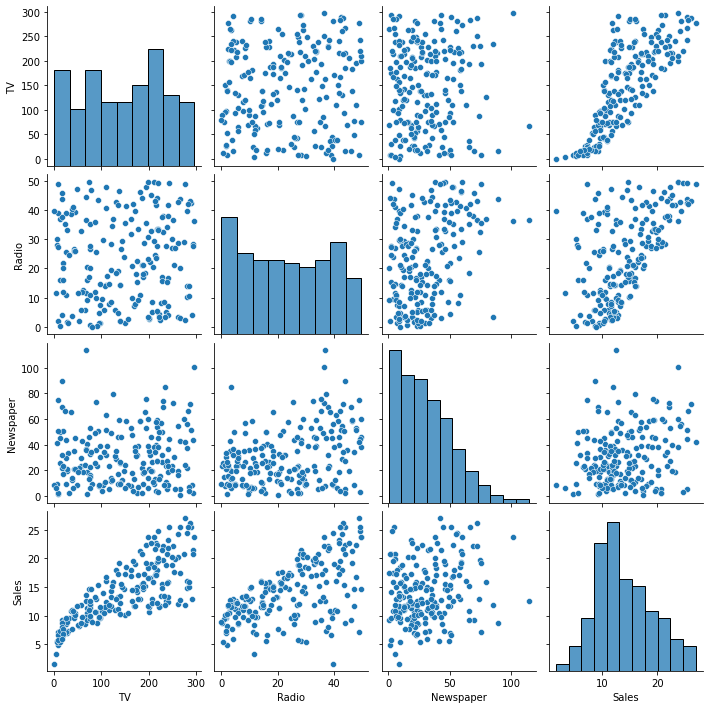

In [25]:
sns.pairplot(data = df)

#here the data is about the sales of a product  and the money used to do advertising on the product in different media as TV,NEWSPAPER and RADIO. 

/var/folders/fj/q35yrt4d19g2nw3g9mdzw2980000gp/T/ipykernel_39648/1901257896.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(by=['Sales'])['TV','Radio','Newspaper'].mean().plot(kind='line')


<AxesSubplot:xlabel='Sales'>

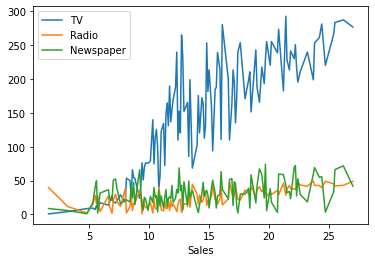

In [54]:
df.groupby(by=['Sales'])['TV','Radio','Newspaper'].mean().plot(kind='line')

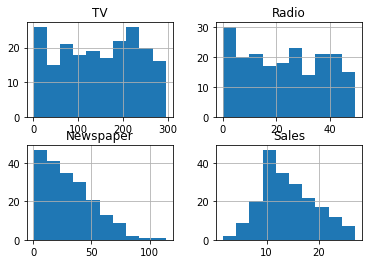

In [55]:
df[['TV','Radio','Newspaper','Sales']].hist()
plt.show()

# Check the summary statistics and discuss the max, min, avg, median,
and percentiles

In [26]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

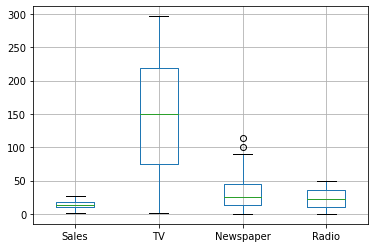

In [72]:
df[['Sales','TV','Newspaper','Radio',]].boxplot()

so far the money used in TV advertisement is more compared to others the MAXIMUM.
the money used in the RADIO advertisement is very low. the MINIMUM.

On an AVERAGE again the money invested in  TV advertiserments are more.

when we check the percentiles, from 25% to 50% the rise is exactly 2times, where in 50% to 100% the rise is not exactly 2times, it is a bit low, but its increasing.
where in RADIO the increase of amounts in the advertisements is always increasing twice. 

though with the less investment in all the advertisemsnts sales of the product is absolutely low. when the investment is increasing in the advertisements the sales are also increasing. 


the standard deviation of the radio advertising is very low, it means most the values lie around its mean.

finally the sales depends on the advertisements made, sales increases when the investments on advertisements increases

# The manager wants to find out whether the same amount was spent
# for the three advertisements (TV , Radio and Newspaper). Comment
# on your findings.

H0: Same amount were spent for the three advertisements

H1: Different amount were spent for three advertisements

#since all the 3 advertisements doesnt depend on each other, ANOVA is used to test the hypothesis.

In [61]:
from scipy.stats import f_oneway
from scipy import stats

we are setting alpha to 5% so it is 0.05

In [67]:
F, p = stats.f_oneway(df['TV'], df['Radio'],df['Newspaper'])

In [68]:
alpha=.05
print("p value :", p)
if p < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0.")

p value : 4.552931539744962e-103
Reject H0


The null hypothesis is rejected and the Alternative hypothesis is failed to be rejected. 
Hence different amount of data is spent on all the 3 advertisements.

In [69]:
f_oneway(df['TV'],df['Radio'], df['Newspaper'])

F_onewayResult(statistic=358.8514595342597, pvalue=4.552931539744962e-103)

here since p value is less than alpha we reject null hypothesis and alternate hypothesis is failed to be rejected. so the same amount of data is not spend on all the 3 advertisements.